<a href="https://colab.research.google.com/github/SNJ292/snj292.github.io/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#14 lines of code
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import math


years = list(range(2012, 2022))
url_start = "https://www.basketball-reference.com/draft/NBA_{}.html"

# We're using the url to populate our file 'draft' with drafts between 2012-2022
for year in years:
  url = url_start.format(year)
  data = requests.get(url)

  with open("draft/{}.html".format(year), "w+")as f:
    f.write(data.text)

In [ ]:
#11 lines of code
dfs = []
for year in years:
  #dfs  will hold a list of the dataframes of each draft 
  with open("draft/{}.html".format(year)) as f:
    page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    draft_table = soup.find(id="stats")
    draft = pd.read_html(str(draft_table))[0]
    draft.head()
    dfs.append(draft)
dfs

[    Rk  Pk   Tm                  Player   College  Yrs    G     MP    PTS  \
 0    1   1  NOH           Anthony Davis  Kentucky   11  628  21623  15065   
 1    2   2  CHA  Michael Kidd-Gilchrist  Kentucky    8  446  10978   3750   
 2    3   3  WAS            Bradley Beal   Florida   11  663  23049  14643   
 3    4   4  CLE            Dion Waiters  Syracuse    8  419  11835   5505   
 4    5   5  SAC         Thomas Robinson    Kansas    5  313   4204   1528   
 ..  ..  ..  ...                     ...       ...  ...  ...    ...    ...   
 57  56  56  TOR         Tomislav Zubčić       NaN  NaN  NaN    NaN    NaN   
 58  57  57  NJN           İlkan Karaman       NaN  NaN  NaN    NaN    NaN   
 59  58  58  MIN           Robbie Hummel    Purdue    2   98   1397    379   
 60  59  59  SAS           Marcus Denmon  Missouri  NaN  NaN    NaN    NaN   
 61  60  60  LAL            Robert Sacre   Gonzaga    4  189   2745    787   
 
      TRB  ...   3P%   FT%  MP.1 PTS.1 TRB.1 AST.1    WS WS/48

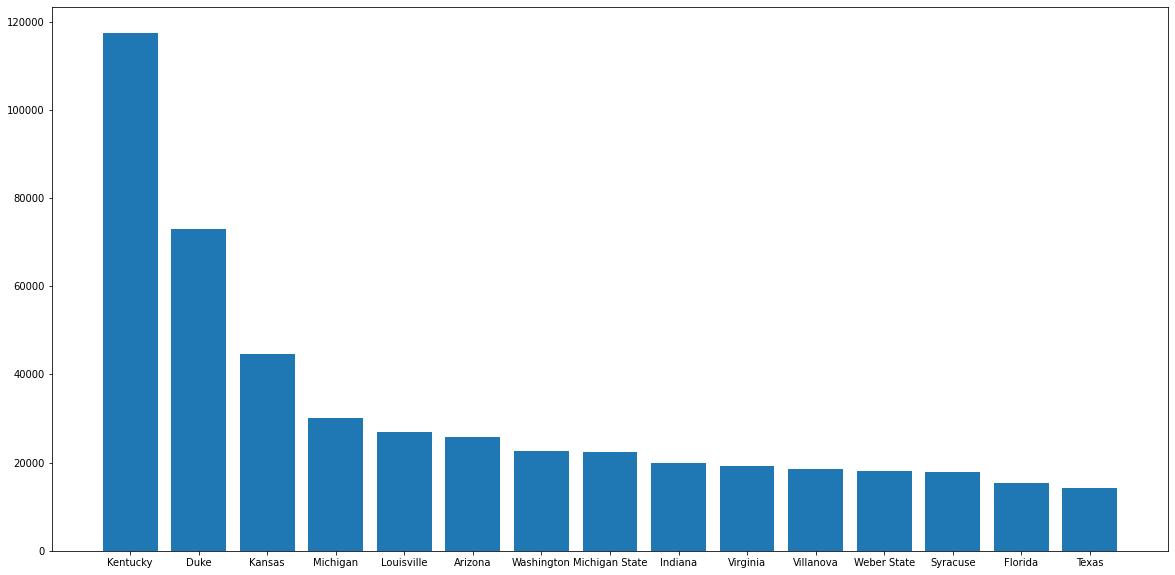

In [ ]:
#What college produces the most point scoring players historically (22). 

college_points = {}

#Iterates through the draft and looks at each player 
for draft in dfs:
  for player in draft.iterrows():
   
    #Finds the college the player used to play for and the total career points that player has made
    if(player[1]["PTS"] != "Totals" and player[1]["PTS"] != "PTS"):
      college = player[1]["College"]
      points = player[1]["PTS"]
      
      #Maps the points to the designated college
      if(college != "NaN"):
        if(college_points.__contains__(college) == True):
          college_points[college] = college_points[college] + float(points)

        elif(college_points.__contains__(college) == False):
          college_points[college] = float(points)

#Removes any empty colleges that don't have any points
items = list(college_points.items())
while len(items) > 0:
  key, val = items.pop()
  if np.isnan(val):
    college_points.pop(key)

#Sorts the dictionary and plots it onto a bar graph
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sorted_cp = sorted(college_points.items(), key=lambda x: x[1], reverse = True)[:15]
plt.bar(range(len(sorted_cp)), [value for key, value in sorted_cp])
plt.xticks(range(len(sorted_cp)), [key for key, value in sorted_cp])
plt.show()



In [ ]:
# Scatter plot of Which pick produces the most points
# Which pick has the highest win share
# Which college has players with the highest win share
# Which college has the best shooters
# Average length of the NBA career based on what college they went to; basically saying what nba player produces

pick = 0
points = 0
for draft in dfs:
  for player in draft.iterrows():
    if(not math.isnan(pick) or not math.isnan(points)):
      pick = int(player[1][1])
      points = int(player[1][8])
    #print(player)

  plt.plot(pick, points)
  plt.legend(loc="upper left")
  fig.set_size_inches(12, 10)


ValueError: ignored

In [1]:
import pandas as pd
import numpy as np
#grabbing the data set from basketball reference
br_tables_on_curry_page = pd.read_html('https://www.basketball-reference.com/players/c/curryst01.html')
steph_curry_regular_season_stats = br_tables_on_curry_page[0]

# dropping the career row
steph_curry_regular_season_stats = steph_curry_regular_season_stats.drop(steph_curry_regular_season_stats.index[-1])
steph_curry_regular_season_stats.head(3)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,21.0,GSW,NBA,PG,80,77,36.2,6.6,14.3,...,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5
1,2010-11,22.0,GSW,NBA,PG,74,74,33.6,6.8,14.2,...,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6
2,2011-12,23.0,GSW,NBA,PG,26,23,28.2,5.6,11.4,...,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7


# Grabbing Curry's Stats

From Basketball Reference we're able to acquire Curry's yearly statistical averages.

In [2]:
#grabbing the NBA league average dataset
br_tables_on_NBA_page = pd.read_html('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html')

regular_season_stats = br_tables_on_NBA_page[0]

#Dropping player weight and all that stuff cuz we dont need that
regular_season_stats = regular_season_stats.drop(regular_season_stats.columns[[0, 2, 3, 4, 5, 6]], axis=1) 
#dropping every year before curry was drafted

regular_season_stats = regular_season_stats.drop(regular_season_stats.index[14:])

#renaming seasons column cuz it was annoying
regular_season_stats = regular_season_stats.rename(columns={"Unnamed: 1_level_0" : "Szn"})


#turning df from multiindex to single index cuz it makes life easir
regular_season_stats.columns = regular_season_stats.columns.map(' '.join)

regular_season_stats = regular_season_stats.rename(columns={"Szn Season" : "Season"})

regular_season_stats.head()

,Season,Per Game MP,Per Game FG,Per Game FGA,Per Game 3P,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,...,Per Game PTS,Shooting FG%,Shooting 3P%,Shooting FT%,Advanced Pace,Advanced eFG%,Advanced TOV%,Advanced ORB%,Advanced FT/FGA,Advanced ORtg
0,2022-23,242.2,41.4,88.2,12.2,34.2,18.2,23.4,10.6,33.1,...,113.2,.469,.355,.781,99.4,.538,13.1,24.2,.207,112.9
1,2021-22,241.4,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,...,110.6,.461,.354,.775,98.2,.532,12.3,23.2,.192,112.0
2,2020-21,241.4,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,...,112.1,.466,.367,.778,99.2,.538,12.4,22.2,.192,112.3
3,2019-20,241.8,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,...,111.8,.460,.358,.773,100.3,.529,12.8,22.5,.201,110.6
4,2018-19,241.6,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,...,111.2,.461,.355,.766,100.0,.524,12.4,22.9,.198,110.4


# NBA League Averages

As above with Curry's stats we do the same with grabbing the league's averages across the years.

In [4]:
#grabbing NBA 3PA ORTG, needs to be a number
regular_season_stats['Per Game 3PA'] = regular_season_stats['Per Game 3PA'].astype(float)
regular_season_stats['Advanced ORtg'] = regular_season_stats['Advanced ORtg'].astype(float)
regular_season_stats['Advanced Pace'] = regular_season_stats['Advanced Pace'].astype(float)
# getting curry 3PA
steph_curry_regular_season_stats['3PA'] = steph_curry_regular_season_stats['3PA'].astype(float)

Currently, we're focusing on 3 point attempts and offensive rating as those are two stats that show where the NBA is trending.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#converting column to array as we need reverse the array so it can be sorted in chronological order
seasons = regular_season_stats['Season'].to_numpy()

seasons = seasons[::-1]

# same as above
threePA = regular_season_stats['Per Game 3PA'].to_numpy()

threePA = threePA[::-1]

pace = regular_season_stats['Advanced Pace'].to_numpy()

pace = pace[::-1]
# grabbing curry 3pa from column
curry3PA = steph_curry_regular_season_stats['3PA'].to_numpy()

The seasons and threePA array are reversed because of how I had scraped basketball references data. The arrays are in order of chronological order after reversing.


Well why are we looking at this dataset anyways? The point is that the NBA has been on a trajectory that has been focused on perimeter play and game of "Inside Outside". The midrange (though still needed) has been effectively phased out (in the regular season).

Below is the shift of the league from a grit and grind match to a high powered offense that is heavily reliant on the three ball.

In [ ]:
regular_season_stats['Advanced ORtg'] = regular_season_stats['Advanced ORtg'].astype(float)
aORtg = regular_season_stats['Advanced ORtg'].to_numpy()

aORtg = aORtg[::-1]
fig, ax = plt.subplots()
plt.grid()
plt.plot(seasons,aORtg, marker='o', color = 'black', markerfacecolor='red', label = "Offensive Rating")
plt.plot(seasons,pace, marker='x', color = 'brown', markerfacecolor='green',label = "Pace")

fig.set_size_inches(12, 10)
plt.title("Offensive Rating over the Seasons")
plt.xlabel("Seasons")
plt.ylabel("Offensive Rating")
for index in range(len(seasons)):
  ax.text(seasons[index], aORtg[index], aORtg[index], size=12)
  ax.text(seasons[index], pace[index], pace[index], size=12)
plt.legend(loc="upper left")
plt.show()

Offensive Rating is the the amount of points produced by a player per 100 possessions. It elimenates all context likes pace and minutes played per game. Using it by itself is not the best way to tell what is going on in the league. However when combined with pace... there is a story to tell. 

Pace is the total number of possessions in a basketball game. The lower number of pace means less possessions by each team. As we can see that with the increase of pace, there's been an increase of offensive rating. The higher number of possessions in a ball game results in more chances to score. Higher pace means more field goal attemps.

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.grid()
plt.plot(seasons,threePA, marker='o', color = 'black', markerfacecolor='red', label = "NBA")
plt.plot(seasons, curry3PA, marker='o', color = 'blue', markerfacecolor='yellow', label = "Curry")
plt.legend(loc="upper left")
fig.set_size_inches(12, 10)
plt.title("Curry 3PA and League 3PA over the Seasons")
plt.xlabel("Seasons")
plt.ylabel("3 Point Attempts")
for index in range(len(seasons)):
  ax.text(seasons[index], threePA[index], threePA[index], size=12)
  ax.text(seasons[index], curry3PA[index], curry3PA[index], size=12)

plt.show()

We're starting from the 2009-10 season because of the man who changed the game, Steph Curry. Prior to his career in the league 3 point shooting was not as mainstream as it was today. There were teams like the D'Antoni Suns, and the Dwight Magic who DID shoot the three ball. But that pales in comparision to what Curry and to an extent Klay Thompson did. From the graph above, we can see that there is a BOOM in three point attempts from 2014 until now. The league nearly DOUBLED in attempts from three from the 09-10 season until now. This is reflective in Curry's playstyle as well. He has nearly changed the game with his three point making. There are players who cannot shoot that well that are still dominant in the league today. Players like Zion Williamson, Ja Morant, and Giannis Antetokounmpo. However these are generational talents that are often if ever replicated in the league. 

After Curry made the All Star for the first time in the 2013-14 season, and won his first championship in 2015-2016, the league had adopted the 3. We can see this in the graph above as well. After 2014 there's been an upward trend that has made the 3 ball neccessary in the league.
Now how does that affect what college's will produce succesful players?

The standard of success will shift based on the era a player resides in. In the 1990s there were hyper athletic 2 guards who could dominate the midrange and finish at the rim. Big Men (PF-C) were dominant in the post and rarely ever stepped outside the midrange to shoot a 3. The rise in the 3 point attempts has been evident in adopted by almost every position in league. If you want to survive in the league now... you WILL be able to have to shoot.

# What do our findings show?

Our findings show that the there has been an increase in offensive firepower over the last 13 years. There has been more of a focus on offense rather than defense. Defense is still a valued trait, however, you can't last in the league long if you only bring defense. There have been players like Kris Dunn, Stanley Johnson, etc who have been elite at defense but could not do anything else.

To survive in the league you have to be able to score to some capacity. Not only that but you have to be able to shoot at some level.

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
y = threePA

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):   
  return slope * x + intercept

def predict(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.title("Linear Regression for 3PA")
plt.xlabel("Seasons")
plt.ylabel("3 Point Attempts")
plt.scatter(x, y, marker='o', color = 'black')
plt.plot(x, mymodel)
plt.show()


print("FINAL 3PA FOR 2023:", predict(2023))
print("FINAL 3PA FOR 2024:", predict(2024))
print("FINAL 3PA FOR 2025:", predict(2025))

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

regular_season_stats['Per Game PTS'] = regular_season_stats['Per Game PTS'].astype(float)
perGamePts = regular_season_stats['Per Game PTS'].to_numpy()
perGamePts = perGamePts[::-1]

x = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
y = perGamePts

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):   
  return slope * x + intercept

def predict(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.title("Linear Regression for Points")
plt.xlabel("Seasons")
plt.ylabel("Points")
plt.scatter(x, y)
plt.scatter(x, y, marker='o', color = 'black')
plt.plot(x, mymodel)
plt.show()


print("FINAL PPG FOR 2023:", predict(2023))
print("FINAL PPG FOR 2024:", predict(2024))
print("FINAL PPG FOR 2025:", predict(2025))

# One Last Thing

Now we can really see how scoring will continue to take off along with 3PA. Offense will continue to be the metric of what dictates a successful career in the NBA (and accolades but those are so far and few between). Players are getting paid more than ever to put up points.